# Objective

 * Use the ratio of supermassive black hole binaries (SMBHBs) and quasars to place limits on the binary fraction, the duty cycle, the quasar binary fraction, and the SMBHB duty cycle.
 * Derive a self-consistent model of SMBHB populations based on quasar populations.

# Method

## The duty cycle

We define the number density of SMBHBs over redshift as
$$
\Phi_{\rm{BHB}, z}(z) = \iint dM_{\rm{BH}, 1} dq \frac{d^{3} \Phi_{\rm{BHB}}}{dz dM_{\rm{BH}, 1} dq}.
$$
The number density of quasars over redshift is defined as
$$
\Phi_{\rm{BHB}, z}(z) = \int dM_{\rm{BH}} \frac{d^{2} \Phi_{\rm{Q}}}{dz dM_{\rm{BH}}}.
$$
and similarly for galaxies,
$$
\Phi_{\rm{Gal}, z}(z) = \int dM_{\rm{Gal}} \frac{d^{2} \Phi_{\rm{Gal}}}{dz dM_{\rm{Gal}}}.
$$
Finally the number density of SMBHBs associated with quasar activity over $z$ is defined as
$$
\Phi_{\rm{BHB, Q}, z}(z) = \iint dM_{\rm{BH}, 1} dq \frac{d^{3} \Phi_{\rm{BHB, Q}}}{dz dM_{\rm{BH}, 1} dq}.
$$

If we consider the duty cycle
$$
f_{\rm{duty}}(z) = \frac{\Phi_{\rm{Q}, z}(z)}{\Phi_{\rm{Gal}, z}(z)}
$$
and the binary fraction
$$
f_{\rm{BHB}}(z) = \frac{\Phi_{\rm{BHB}, z}(z)}{\Phi_{\rm{Gal}, z}(z)},
$$
we can see that
$$
\frac{f_{\rm{BHB}}(z)}{f_{\rm{duty}}(z)} = \frac{\Phi_{\rm{BHB}, z}(z)}{\Phi_{\rm{Q}, z}(z)},
$$
i.e., the ratio of SMBHBs to quasars is the same as the ratio of the fraction of massive galaxies hosting a binary $f_{\rm{BHB}}(z)$ over the quasar duty cycle $f_{\rm{duty}}(z)$ (i.e. the fraction of galaxies hosting a quasar).

Similarly, if we consider the fraction of SMBHBs with associated quasar activity, $f_{\rm{Q}}(z | \rm{BHB}) = \Phi_{\rm{BHB, Q}, z}(z) / \Phi_{\rm{BHB}, z}(z)$, and the fraction of quasars with associated binary activity, $f_{\rm{BHB}}(z | \rm{Quasar}) = \Phi_{\rm{BHB, Q}, z}(z) / \Phi_{\rm{Q}, z}(z)$, we also find
$$
\frac{f_{\rm{BHB}}(z | \rm{Quasar})}{f_{\rm{Q}}(z | \rm{BHB})} = \frac{\Phi_{\rm{BHB}, z}(z)}{\Phi_{\rm{Q}, z}(z)},
$$
which is essentially an application of Bayes Theorem. Thus, by leveraging the ratio of SMBHB and quasar populations each population fraction can be used to place limits on the other.

Utilizing the local ratio we found previously, we can thus place constraints on local population fractions.

## Updated quasar-based model

Additionally, we can use these fractions to derive a SMBHB population based on quasar populations, i.e.
$$
\Phi_{\rm{BHB}, z}(z) = \frac{f_{\rm{BHB}}(z)}{f_{\rm{duty}}(z)} \Phi_{\rm{Q}, z}(z) \\
\iint dM_{\rm{BH}, 1} dq \frac{d^{3} \Phi_{\rm{BHB}}}{dz dM_{\rm{BH}, 1} dq} = \frac{f_{\rm{BHB}}(z)}{f_{\rm{duty}}(z)} \int dM_{\rm{BH}} \frac{d^{2} \Phi_{\rm{Q}}}{dz dM_{\rm{BH}}} \\
\Rightarrow \int dq \frac{d^{3} \Phi_{\rm{BHB}}}{dz dM_{\rm{BH}, 1} dq} = \frac{f_{\rm{BHB}}(z)}{f_{\rm{duty}}(z)} \frac{d^{2} \Phi_{\rm{Q}}}{dz dM_{\rm{BH}}},
$$
which assumes that the quasar mass is proportional to the primary SMBH mass, rather than the total SMBHB mass. To get a SMBHB population, we assume a self-normalized distribution of mass-ratios $p(q)$, i.e.,
$$
\frac{d^{3} \Phi_{\rm{BHB}}}{dz dM_{\rm{BH}, 1} dq} = \frac{f_{\rm{BHB}}(z)}{f_{\rm{duty}}(z)} \frac{d^{2} \Phi_{\rm{Q}}}{dz dM_{\rm{BH}}} \frac{p(q)}{\int dq p(q)}.
$$

# Data

## Load libraries/data

We first load all the data and libraries we need. We additionally define common analysis parameters here.

In [1]:
import numpy as np
import pandas as pd
import pickle
import h5py
from IPython.display import display, Math
from scipy.stats import truncnorm
import astropy.uncertainty as unc

In [2]:
# use a 95% confidence interval
quantiles = [.025, .5, .975]

In [3]:
n_samples = int(2 ** 10)

In [4]:
def trunc_norm_dist(a=0, b=np.inf, loc=0, scale=1, size=n_samples):
    return truncnorm.rvs(a=(a - loc) / scale, b=(b - loc) / scale,
                                          loc=loc, scale=scale,
                                          size=size)

### AGN-based model

Load the ratio $\Phi_{\rm{BHB}, 0} / \Phi_{\rm{Q}, 0}$ which we found previously.

In [5]:
# load and display the ratio
with h5py.File('../data/processed/agn_proxy.h5', 'r') as hf:
    bhb_agn_ratio = hf['bhb_agn_ratio'][:]

bhb_agn_ratio_q = np.quantile(bhb_agn_ratio, q=[.16, .5, .84])
display(Math(r'\frac{{\Phi_{{\rm{{BHB}}, 0}}}}{{\Phi_{{\rm{{Q, 0}}}}}} '
             r'= {0:.1f}_{{-{1:.1f}}}^{{+{2:.1f}}}'.format(bhb_agn_ratio_q[1],
                                          bhb_agn_ratio_q[1] - bhb_agn_ratio_q[0],
                                          bhb_agn_ratio_q[2] - bhb_agn_ratio_q[1])))

<IPython.core.display.Math object>

### Mingarelli et al. 2017

Load the Mingarelli et al. 2017 galaxy catalog, along with the predicted number of local binaries.

#### Galaxy catalog

In [6]:
galaxies = pd.read_csv('../data/external/25/added_mks.lst', delimiter='\s+',
                       usecols=[0, 1, 2, 3, 4], index_col=False)
galaxies = galaxies.append(pd.read_csv('../data/external/25/schutzMa_extension.txt',
                                       delimiter='\s+',
                                       usecols=[0, 1, 2, 3, 4],
                                       index_col=False))
catalog = pd.read_csv('../data/external/25/2mass_galaxies.lst', delimiter='\s+',
                      usecols=[1, 2, 3, 4, 5], index_col=False,
                      names=['RA', 'DEC', 'D_L(Mpc)', 'Kmag', 'Name'])
catalog
N_BH = len(catalog.index) + 7

#### Local binaries

In [7]:
with open('../models/M17_local_binaries.pkl', 'rb') as f:
    local_binaries = pickle.load(f)

print(local_binaries)
N_BHB_mingarelli = local_binaries.amplitude

Model: Const1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1024
Parameters:
    amplitude
    ---------
         91.0
         95.0
         91.0
         85.0
         96.0
         97.0
         85.0
         94.0
         88.0
         90.0
          ...
        101.0
         93.0
         96.0
         96.0
         82.0
         70.0
         97.0
         95.0
         95.0
         88.0
         84.0
    Length = 1024 rows


In [8]:
with open('../models/M17_number_density.pkl', 'rb') as f:
    local_binary_number_density = pickle.load(f)

print(local_binary_number_density)

Model: Const1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1024
Parameters:
          amplitude       
    ----------------------
    1.6215061148339906e-06
    1.6927811088926275e-06
    1.6215061148339906e-06
    1.5145936237460352e-06
    1.7105998574072867e-06
     1.728418605921946e-06
    1.5145936237460352e-06
    1.6749623603779682e-06
    1.5680498692900129e-06
    1.6036873663193313e-06
                       ...
     1.799693599980583e-06
     1.657143611863309e-06
    1.7105998574072867e-06
    1.7105998574072867e-06
    1.4611373782020575e-06
    1.2473123960261466e-06
     1.728418605921946e-06
    1.6927811088926275e-06
    1.6927811088926275e-06
    1.5680498692900129e-06
     1.496774875231376e-06
    Length = 1024 rows


## Parameter Space

We define the analysis parameter space for all of our local population fractions, i.e., $f_{\rm{duty}}(z = 0)$, $f_{\rm{BHB}}(z = 0)$, $f_{\rm{Q}}(z = 0 | \rm{BHB})$, and $f_{\rm{BHB}}(z = 0 | \rm{Quasar})$, noting that by definition, none of these can be more than $1$. Because the ratio we have is a local ratio, we limit ourselves to an analysis of the local population fractions only.

In [9]:
# we define a general parameter space for all population fractions
f_min = 1e-4
f_max = 1
f_space = np.logspace(np.log10(f_min), np.log10(f_max))

# Analysis

## $f_{\rm{BHB}, 0}$ vs. $f_{\rm{duty}, 0}$

We first plot the ratio
$$
\frac{f_{\rm{BHB}, 0}}{f_{\rm{duty}, 0}} = \frac{\Phi_{\rm{BHB}, 0}}{\Phi_{\rm{Q}, 0}},
$$
where $f_{\rm{BHB}, 0} = f_{\rm{BHB}}(z = 0)$, $f_{\rm{duty}, 0} = f_{\rm{duty}}(z = 0)$, $\Phi_{\rm{BHB}, 0} = \Phi_{\rm{BHB}, z}(z = 0)$, and $\Phi_{\rm{Q}, 0} = \Phi_{\rm{Q}, z}(z = 0)$.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('colorblind')
figparams = {'font.family': 'DejaVu Sans',
             'font.serif':'Times',
             'text.latex.preamble': r'\usepackage{amsmath}',
             'text.usetex': True,
             'hatch.linewidth' : 3.0,
             'figure.figsize': (12, 9)}
plt.rcParams.update(figparams)

cs = plt.rcParams['axes.prop_cycle'].by_key()['color']
alpha = .3

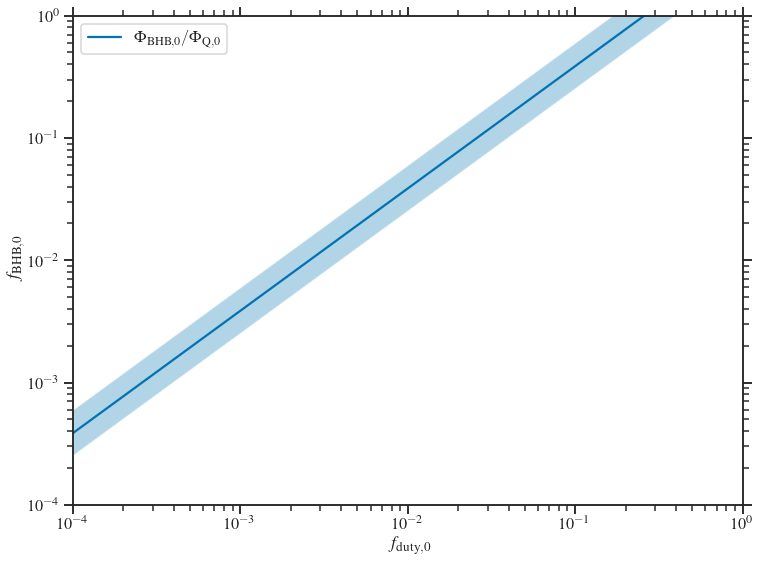

In [11]:
plt.figure()

plt.plot(f_space, f_space * bhb_agn_ratio_q[1], label=r'$\Phi_{\rm{BHB}, 0} / \Phi_{\rm{Q}, 0}$')
plt.fill_between(f_space, f_space * bhb_agn_ratio_q[0],
                 f_space * bhb_agn_ratio_q[2], alpha=alpha)

plt.xscale('log')
plt.xlim(left=f_min, right=f_max)
plt.xlabel(r'$f_{\rm{duty}, 0}$')

plt.yscale('log')
plt.ylim(bottom=f_min, top=f_max)
plt.ylabel(r'$f_{\rm{BHB}, 0}$')

plt.tick_params(which='both', top=True, bottom=True, left=True, right=True)
plt.legend()

plt.show()

### Upper limits

We can see that the upper limit $f_{\rm{BHB}, 0} \leq 1$ combined with $\Phi_{\rm{BHB}, 0} / \Phi_{\rm{Q}, 0}$ implies an upper limit on $f_{\rm{duty}, 0}$ less than unity, while $f_{\rm{duty}, 0} \leq 1$ yields no physical limits on $f_{\rm{BHB}, 0}$.

In [12]:
# calculate the binary fraction as a function of the duty cycle
f_bhb = bhb_agn_ratio[np.newaxis, :] * f_space[:, np.newaxis]
f_bhb_q = np.quantile(f_bhb, q=quantiles, axis=-1)
display(Math(r'f_{{\rm{{duty}}, 0}} \leq 1 \Rightarrow f_{{\rm{{BHB}}, 0}}'
             r' \leq {0:.2f}_{{-{1:.2f}}}^{{+{2:.2f}}}'.format(f_bhb_q[1, -1],
                                          f_bhb_q[1, -1] - f_bhb_q[0, -1],
                                          f_bhb_q[2, -1] - f_bhb_q[1, -1])))


# calculate the duty cycle as a function of the binary fraction
f_duty = f_space[:, np.newaxis] / bhb_agn_ratio[np.newaxis, :]
f_duty_q = np.quantile(f_duty, q=quantiles, axis=-1)
display(Math(r'f_{{\rm{{BHB}}, 0}} \leq 1 \Rightarrow f_{{\rm{{duty}}, 0}}'
             r' \leq {0:.2f}_{{-{1:.2f}}}^{{+{2:.2f}}}'.format(f_duty_q[1, -1],
                                          f_duty_q[1, -1] - f_duty_q[0, -1],
                                          f_duty_q[2, -1] - f_duty_q[1, -1])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Assumed duty cycles

Because these upper limits are not very restrictive, we next assume values of $f_{\rm{duty}, 0}$ from the literature and compare the implied values of $f_{\rm{BHB}, 0}$.

#### Shen et al. 2020

In [13]:
f_duty_s20 = .03
f_bhb_s20 = bhb_agn_ratio * f_duty_s20
f_bhb_s20_q = np.quantile(f_bhb_s20, q=quantiles, axis=-1)
display(Math(r'f_{{\rm{{duty}}, 0, \rm{{S20}}}}'
             r' = {0:.2f} \Rightarrow f_{{\rm{{BHB}}, 0, \rm{{S20}}}}'
             r' = {1:.2f}_{{-{2:.2f}}}^{{+{3:.2f}}}'
             .format(f_duty_s20, f_bhb_s20_q[1],
                     f_bhb_s20_q[1] - f_bhb_s20_q[0],
                     f_bhb_s20_q[2] - f_bhb_s20_q[1])))

<IPython.core.display.Math object>

#### Mingarelli et al. 2017

From the Mingarelli et al. 2017 sample we can estimate the local duty cycle, noting that there are conservatively 20 and as many as 60 quasars in the catalog.

In [14]:
f_duty_m17_low = 20 / N_BH

f_bhb_m17_low = bhb_agn_ratio * f_duty_m17_low
f_bhb_m17_low_q = np.quantile(f_bhb_m17_low, q=quantiles, axis=-1)
display(Math(r'f_{{\rm{{duty}}, 0, \rm{{M17}}}}'
             r' = {0:.3f} \Rightarrow f_{{\rm{{BHB}}, 0, \rm{{S20}}}}'
             r' = {1:.2f}_{{-{2:.2f}}}^{{+{3:.2f}}}'
             .format(f_duty_m17_low, f_bhb_m17_low_q[1],
                     f_bhb_m17_low_q[1] - f_bhb_m17_low_q[0],
                     f_bhb_m17_low_q[2] - f_bhb_m17_low_q[1])))

<IPython.core.display.Math object>

In [15]:
f_duty_m17_high = 60 / N_BH

f_bhb_m17_high = bhb_agn_ratio * f_duty_m17_high
f_bhb_m17_high_q = np.quantile(f_bhb_m17_high, q=quantiles, axis=-1)
display(Math(r'f_{{\rm{{duty}}, 0, \rm{{M17}}}}'
             r' = {0:.3f} \Rightarrow f_{{\rm{{BHB}}, 0, \rm{{S20}}}}'
             r' = {1:.2f}_{{-{2:.2f}}}^{{+{3:.2f}}}'
             .format(f_duty_m17_high, f_bhb_m17_high_q[1],
                     f_bhb_m17_high_q[1] - f_bhb_m17_high_q[0],
                     f_bhb_m17_high_q[2] - f_bhb_m17_high_q[1])))

<IPython.core.display.Math object>

#### Volonteri et al. 2003

#### Volonteri et al. 2009

#### Duty cycle plot

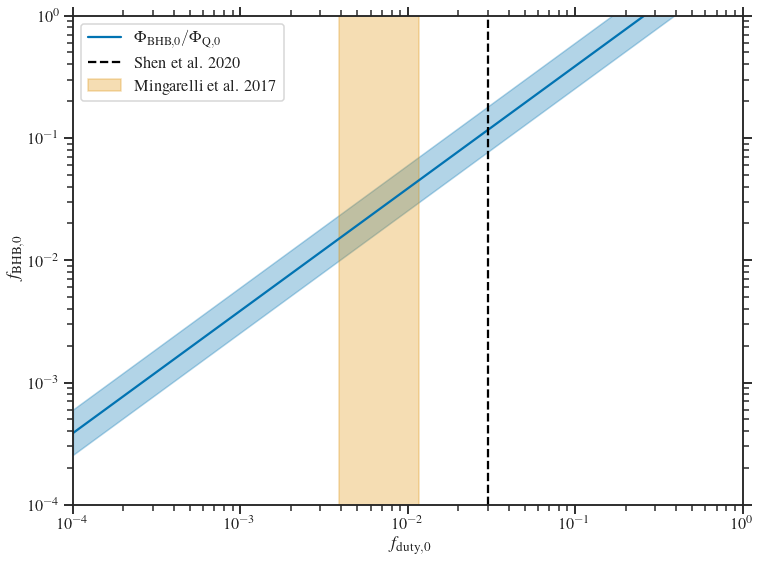

In [16]:
plt.figure()

plt.plot(f_space, f_space * bhb_agn_ratio_q[1], label=r'$\Phi_{\rm{BHB}, 0} / \Phi_{\rm{Q}, 0}$')
plt.fill_between(f_space, f_space * bhb_agn_ratio_q[0],
                 f_space * bhb_agn_ratio_q[2], alpha=alpha, color=cs[0])

plt.axvline(f_duty_s20, linestyle='--', color='black', label='Shen et al. 2020')

plt.axvspan(f_duty_m17_low, f_duty_m17_high, alpha=alpha, color=cs[1], label='Mingarelli et al. 2017')

plt.xscale('log')
plt.xlim(left=f_min, right=f_max)
plt.xlabel(r'$f_{\rm{duty}, 0}$')

plt.yscale('log')
plt.ylim(bottom=f_min, top=f_max)
plt.ylabel(r'$f_{\rm{BHB}, 0}$')

plt.tick_params(which='both', top=True, bottom=True, left=True, right=True)
plt.legend()

plt.show()

### Assumed binary fractions

Next we do the reverse, and we instead assume binary fractions to compare the implied duty cycles.

#### Volonteri et al. 2003

In [17]:
f_bhb_v03 = .1

f_duty_v03 = f_bhb_v03 / bhb_agn_ratio
f_duty_v03_q = np.quantile(f_duty_v03, q=quantiles, axis=-1)

display(Math(r'f_{{\rm{{BHB}}, 0, \rm{{V03}}}}'
             r' = {0:.3f}'
             r'\Rightarrow f_{{\rm{{duty}}, 0, \rm{{V03}}}}'
             r' = {1:.3f}_{{-{2:.3f}}}^{{+{3:.3f}}}'
             .format(f_bhb_v03, f_duty_v03_q[1],
                     f_duty_v03_q[1] - f_duty_v03_q[0],
                     f_duty_v03_q[2] - f_duty_v03_q[1])))

<IPython.core.display.Math object>

#### Mingarelli et al. 2017

In [18]:
f_bhb_m17 = N_BHB_mingarelli / N_BH
f_bhb_m17_q = np.quantile(f_bhb_m17, q=quantiles)

f_duty_m17 = f_bhb_m17 / bhb_agn_ratio
f_duty_m17_q = np.quantile(f_duty_m17, q=quantiles, axis=-1)

display(Math(r'f_{{\rm{{BHB}}, 0, \rm{{M17}}}}'
             r' = {0:.3f}_{{-{1:.3f}}}^{{+{2:.3f}}}'
             r'\Rightarrow f_{{\rm{{duty}}, 0, \rm{{M17}}}}'
             r' = {3:.3f}_{{-{4:.3f}}}^{{+{5:.3f}}}'
             .format(f_bhb_m17_q[1], f_bhb_m17_q[1] - f_bhb_m17_q[0],
                     f_bhb_m17_q[2] - f_bhb_m17_q[1],
                     f_duty_m17_q[1], f_duty_m17_q[1] - f_duty_m17_q[0],
                     f_duty_m17_q[2] - f_duty_m17_q[1])))

<IPython.core.display.Math object>

#### Mingarelli et al. 2017 (corrected to NG12.5)

In [19]:
f_bhb_m17_ng12 = 4.1 * N_BHB_mingarelli / N_BH
f_bhb_m17_ng12_q = np.quantile(f_bhb_m17_ng12, q=quantiles)

f_duty_m17_ng12 = f_bhb_m17_ng12 / bhb_agn_ratio
f_duty_m17_ng12_q = np.quantile(f_duty_m17_ng12, q=quantiles, axis=-1)

display(Math(r'f_{{\rm{{BHB}}, 0, \rm{{M17}}}}'
             r' = {0:.3f}_{{-{1:.3f}}}^{{+{2:.3f}}}'
             r'\Rightarrow f_{{\rm{{duty}}, 0, \rm{{S20}}}}'
             r' = {3:.3f}_{{-{4:.3f}}}^{{+{5:.3f}}}'
             .format(f_bhb_m17_ng12_q[1], f_bhb_m17_ng12_q[1] - f_bhb_m17_ng12_q[0],
                     f_bhb_m17_ng12_q[2] - f_bhb_m17_ng12_q[1],
                     f_duty_m17_ng12_q[1], f_duty_m17_ng12_q[1] - f_duty_m17_ng12_q[0],
                     f_duty_m17_ng12_q[2] - f_duty_m17_ng12_q[1])))

<IPython.core.display.Math object>

#### Bundy et al. 2009

In [20]:
m_bundy = unc.normal(1.6, std=1.6, n_samples=n_samples).distribution
fp_bundy = trunc_norm_dist(a=0, b=np.inf, loc=.03, scale=.02, size=n_samples) / (1.55 ** m_bundy)

In [21]:
fp_bundy_q = np.quantile(fp_bundy, q=quantiles)

#### de Ravel et al. 2009

In [22]:
fp_10_de_ravel = trunc_norm_dist(a=0, b=np.inf, loc=.0728, scale=.0681, size=n_samples)

In [23]:
fp_10_de_ravel_q = np.quantile(fp_10_de_ravel, q=quantiles)

#### Lopez-Sanjuan et al. 2012

In [24]:
fp_lopez = trunc_norm_dist(a=0, b=np.inf, loc=.019, scale=.003, size=n_samples)

In [25]:
fp_lopez_q = np.quantile(fp_lopez, q=quantiles)

#### Duty cycle plot

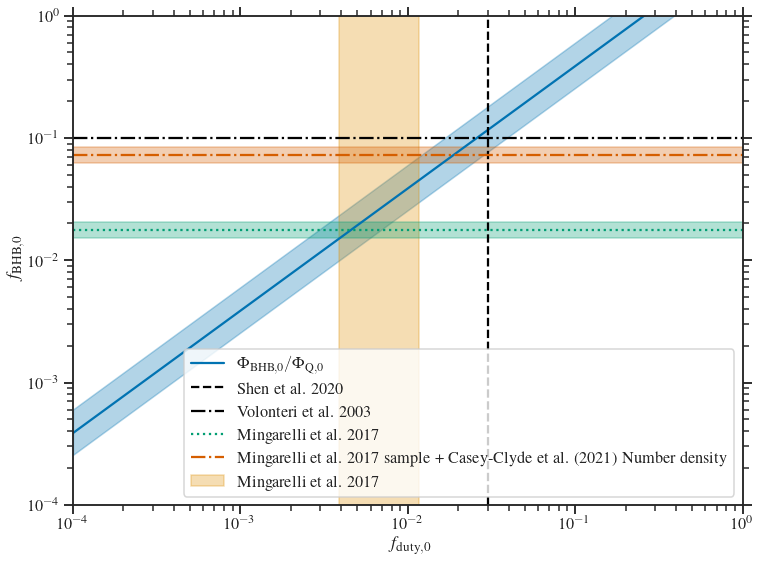

In [26]:
plt.figure()

plt.plot(f_space, f_space * bhb_agn_ratio_q[1], label=r'$\Phi_{\rm{BHB}, 0} / \Phi_{\rm{Q}, 0}$')
plt.fill_between(f_space, f_space * bhb_agn_ratio_q[0],
                 f_space * bhb_agn_ratio_q[2], alpha=alpha, color=cs[0])

# Duty cycle limits
plt.axvline(f_duty_s20, linestyle='--', color='black', label='Shen et al. 2020')
plt.axvspan(f_duty_m17_low, f_duty_m17_high, alpha=alpha, color=cs[1], label='Mingarelli et al. 2017')

# Binary fraction limits
plt.axhline(f_bhb_v03, linestyle='-.', color='black', label='Volonteri et al. 2003')
plt.axhline(f_bhb_m17_q[1], color=cs[2], linestyle=':', label='Mingarelli et al. 2017')
plt.axhspan(f_bhb_m17_q[0], f_bhb_m17_q[2], alpha=alpha, color=cs[2])
# plt.axhline(fp_bundy_q[1], color=cs[3], linestyle=':', label='Bundy et al. 2009')
# plt.axhspan(fp_bundy_q[0], fp_bundy_q[2], alpha=alpha, color=cs[3])
# plt.axhline(fp_10_de_ravel_q[1], color=cs[4], linestyle=':', label='de Ravel et al. 2009')
# plt.axhspan(fp_10_de_ravel_q[0], fp_10_de_ravel_q[2], alpha=alpha, color=cs[4])
# plt.axhline(fp_lopez_q[1], color=cs[5], linestyle=':', label='Lopez-Sanjuan et al. 2012')
# plt.axhspan(fp_lopez_q[0], fp_lopez_q[2], alpha=alpha, color=cs[5])
plt.axhline(f_bhb_m17_ng12_q[1], color=cs[3], linestyle='-.', label='Mingarelli et al. 2017 sample + Casey-Clyde et al. (2021) Number density')
plt.axhspan(f_bhb_m17_ng12_q[0], f_bhb_m17_ng12_q[2], alpha=alpha, color=cs[3])

plt.xscale('log')
plt.xlim(left=f_min, right=f_max)
plt.xlabel(r'$f_{\rm{duty}, 0}$')

plt.yscale('log')
plt.ylim(bottom=f_min, top=f_max)
plt.ylabel(r'$f_{\rm{BHB}, 0}$')

plt.tick_params(which='both', top=True, bottom=True, left=True, right=True)
plt.legend()

plt.show()

## $f_{\rm{BHB}}(z = 0 | \rm{Quasar})$ vs. $f_{\rm{Q}}(z = 0 | \rm{BHB})$

We next examine
$$
\frac{f_{\rm{BHB}}(z = 0 | \rm{Quasar})}{f_{\rm{Q}}(z = 0 | \rm{BHB})} = \frac{\Phi_{\rm{BHB}, 0}}{\Phi_{\rm{Q}, 0}},
$$
starting with a plot of this ratio

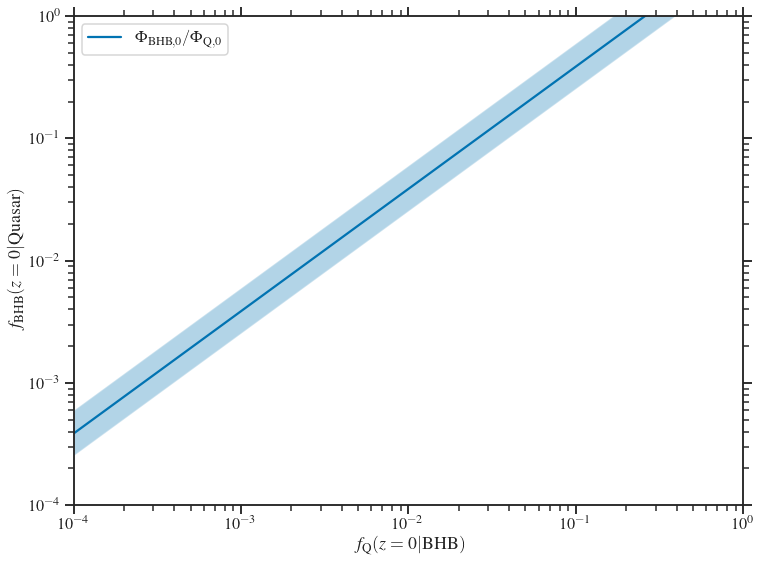

In [27]:
plt.figure()

plt.plot(f_space, f_space * bhb_agn_ratio_q[1], label=r'$\Phi_{\rm{BHB}, 0} / \Phi_{\rm{Q}, 0}$')
plt.fill_between(f_space, f_space * bhb_agn_ratio_q[0],
                 f_space * bhb_agn_ratio_q[2], alpha=alpha)

plt.xscale('log')
plt.xlim(left=f_min, right=f_max)
plt.xlabel(r'$f_{\rm{Q}}(z = 0 | \rm{BHB})$')

plt.yscale('log')
plt.ylim(bottom=f_min, top=f_max)
plt.ylabel(r'$f_{\rm{BHB}}(z = 0 | \rm{Quasar})$')

plt.tick_params(which='both', top=True, bottom=True, left=True, right=True)
plt.legend()

plt.show()

### Upper limits

Similarly to the previous section, we can see that $f_{\rm{BHB}}(z = 0 | \rm{Quasar}) \leq 1$ implies an upper limit $f_{\rm{Q}}(z = 0 | \rm{BHB}) < 1$, while the reverse does not.

In [28]:
# calculate the binary fraction given a population of quasars
f_bhb_quasar = bhb_agn_ratio[np.newaxis, :] * f_space[:, np.newaxis]
f_bhb_quasar_q = np.quantile(f_bhb_quasar, q=quantiles, axis=-1)
display(Math(r'f_{{\rm{{Q}}}}(z = 0 | \rm{{BHB}}) \leq 1 \Rightarrow f_{{\rm{{BHB}}}}(z = 0 | \rm{{Quasar}})'
             r' \leq {0:.2f}_{{-{1:.2f}}}^{{+{2:.2f}}}'.format(f_bhb_quasar_q[1, -1],
                                          f_bhb_quasar_q[1, -1] - f_bhb_quasar_q[0, -1],
                                          f_bhb_quasar_q[2, -1] - f_bhb_quasar_q[1, -1])))


# calculate the duty cycle given a population of binaries
f_quasar_bhb = f_space[:, np.newaxis] / bhb_agn_ratio[np.newaxis, :]
f_quasar_bhb_q = np.quantile(f_quasar_bhb, q=quantiles, axis=-1)
display(Math(r'f_{{\rm{{BHB}}}}(z = 0 | \rm{{Quasar}}) \leq 1 \Rightarrow f_{{\rm{{Q}}}}(z = 0 | \rm{{BHB}})'
             r' \leq {0:.2f}_{{-{1:.2f}}}^{{+{2:.2f}}}'.format(f_quasar_bhb_q[1, -1],
                                          f_quasar_bhb_q[1, -1] - f_quasar_bhb_q[0, -1],
                                          f_quasar_bhb_q[2, -1] - f_quasar_bhb_q[1, -1])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>